In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [75]:
image= cv2.imread('Desktop/Udacity/green_screen.jpg')

In [76]:
print("This image is : ", type(image), "Of size : ", image.shape)

This image is :  <class 'numpy.ndarray'> Of size :  (360, 640, 3)


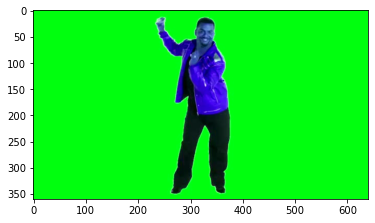

In [77]:
%matplotlib inline
plt.imshow(image) ## image looks weird as OpenCv reads images in BGR and RBG 

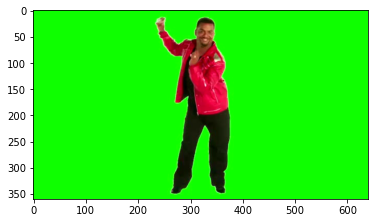

In [78]:
# so lets make a copy and use opencv to change this from BGR to RGB 

image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB) #colour convesion function, takes in the image and coversion code
plt.imshow(image_copy)


In [89]:
# create lower and upper threshold for Blue 
lower_blue = np.array([0,200,0])
upper_blue = np.array([250,255,250])

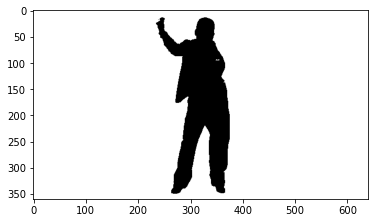

In [90]:
# create a mask to isolate a selected area of interest 
mask= cv2.inRange(image_copy, lower_blue, upper_blue) #this mask will display only pixels in this range, other pixels are turned black
plt.imshow(mask, cmap='gray')


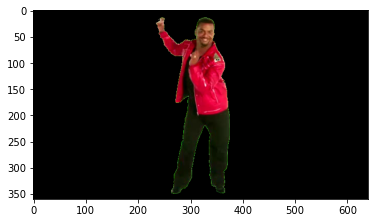

In [95]:
masked_image= np.copy(image_copy)

# balck is 0 pixel value , lets take out the non-black pixels (backgroud/green screen)
# change all these black pixels to 0,0,0

masked_image[mask != 0] = [0,0,0] # overlap masked_image and mask(backgroud)
plt.imshow(masked_image)

(830, 1000, 3)


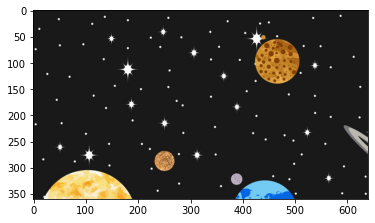

In [117]:
b_image = cv2.imread('Desktop/Udacity/background.jpg')
b_image = cv2.cvtColor(b_image, cv2.COLOR_BGR2RGB)
print(b_image.shape)
#plt.imshow(b_image)
crop_b = b_image[0:360, 0:640]
plt.imshow(crop_b)

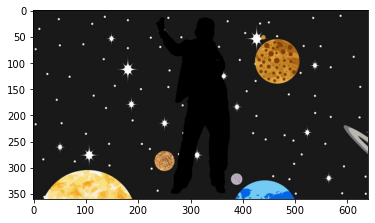

In [118]:
crop_b[mask==0] = [0,0,0]
plt.imshow(crop_b)

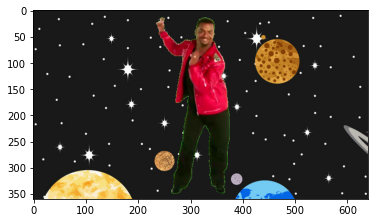

In [119]:
f_image = crop_b + masked_image
plt.imshow(f_image)